### About Data
The data is obtain from tableau public website. Its about the HollywoodsMostProfitableStories.

In [27]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Missing values with na_values parameter
We can define a na_values parameter with the values we want to be recognized as NA/NaN. In this case empty strings " ", _, ?  - will be recognized as null values

In [28]:
# importing the data
stories_df = pd.read_csv("HollywoodsMostProfitableStories.csv", na_values=[" ", "?","-", "_"])

#### Checking in the size of our dataset
1.The number of total elements in the HollywoodsMostProfitableStories dataframe with both missing values included

2.The number of colums and rows in the dataframe

In [29]:
# Explore the size and number of rows and columns
print("THE SAMMARY OF OUR DATAFRAME")
print("Number of Elements:", stories_df.size)
# print("Number of Elements:", np.product(stories_df.shape)) # alternative for finding the size
print("Number of rows:", stories_df.shape[0])
print("Number of columns:", stories_df.shape[1])
stories_df.head()

THE SAMMARY OF OUR DATAFRAME
Number of Elements: 592
Number of rows: 74
Number of columns: 8


,Film,Genre,Lead Studio,Audience_Score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


### Cleaning and preparing our data

##### How many missing data points do we have in our dataset?

In [30]:
#number of missing data points per column
missing_values_count = stories_df.isnull().sum()
# look at the number of missing points in all columns
missing_values_count[0:]

Film                 0
Genre                0
Lead Studio          1
Audience_Score %     1
Profitability        3
Rotten Tomatoes %    1
Worldwide Gross      0
Year                 0
dtype: int64

### Percentage of missing values
That seems like a little! It might be helpful to see what percentage of the values in our dataset are missing to give us a better sense of the scale of this problem:

In [31]:
#total size and how many total missing values do we have?
total_size = stories_df.size
total_missing = missing_values_count.sum()

#percentage of the data missing
missing_percentage = (total_missing / total_size) * 100
print("The percentage of missing values: ",missing_percentage, "%")

The percentage of missing values:  1.0135135135135136 %


## About missing values
From the information above, it is evident that we have one missing value in the "Lead Studio" column. We can reasonably assume that this missing value represents either an independent studio or the studio that preceded it in our dataset. Nevertheless, including this missing value may introduce unnecessary noise into our data. Furthermore, the impact on our analysis is expected to be minimal, as it constitutes just a single data point.

When it comes to the "Audience Score %," "Rotten Tomatoes %," and "Profitability" columns, it is challenging to make informed guesses about the missing values. They may be absent due to a lack of data or because they were never recorded. Given this uncertainty and the fact that the number of missing values is relatively small, we have chosen to drop these values from our dataset. This decision helps ensure that our analysis remains free from potentially misleading information and maintains data integrity, even though we lose only a limited amount of data.

In [8]:
#remove all the rows that contain a missing value
stories_df.dropna()

,Film,Genre,Lead Studio,Audience_Score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007
...,...,...,...,...,...,...,...,...
68,Water For Elephants,Drama,20th Century Fox,72.0,3.081421,60.0,117.094000,2011
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010


## Explotary Analysis and Visualiazation

#### Summary Statistics

In [9]:
# Compute summary statistics for numeric columns
summary_stats = stories_df.describe().transpose()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Audience_Score %,73.0,64.136986,13.647665,35.000,52.00000,64.000000,76.000000,89.000
Profitability,71.0,4.741610,8.292017,0.005,1.79068,2.642353,4.850958,66.934
Rotten Tomatoes %,73.0,47.356164,26.242655,3.000,27.00000,45.000000,65.000000,96.000
Worldwide Gross,74.0,136.351979,157.067561,0.025,32.44750,73.198612,190.185250,709.820
Year,74.0,2009.054054,1.353756,2007.000,2008.00000,2009.000000,2010.000000,2011.000


In [10]:
# Compute the range for 'Audience score %' and 'Rotten Tomatoes %'
range_audience_score = stories_df['Audience_Score %'].max() - stories_df['Audience_Score %'].min()
range_rotten_tomatoes = stories_df['Rotten Tomatoes %'].max() - stories_df['Rotten Tomatoes %'].min()

In [11]:
# printing the ranges 'Audience score %' and 'Rotten Tomatoes %'
print(f'range_audience_score : {range_audience_score}\nrange_rotten_tomatoes : {range_rotten_tomatoes}')

range_audience_score : 54.0
range_rotten_tomatoes : 93.0


Finding the number of Genres and Lead Studios, together with there count using the value_count function. Also the number of movies produced each year in our data

In [12]:
#finding each genre count
print(stories_df['Genre'].value_counts())

Genre
Comedy       41
Romance      15
Drama        13
Animation     3
Action        1
Fantasy       1
Name: count, dtype: int64


In [13]:
#finding each studio count
print(stories_df['Lead Studio'].value_counts())

Lead Studio
Independent              19
Warner Bros.             12
Universal                 7
Disney                    7
Fox                       6
Summit                    5
Sony                      4
Paramount                 4
The Weinstein Company     3
Lionsgate                 2
20th Century Fox          2
New Line                  1
CBS                       1
Name: count, dtype: int64


In [14]:
#finding number of movies recorded/produced each year
year_count = stories_df['Year'].value_counts()
year_count

Year
2008    19
2010    19
2011    13
2009    12
2007    11
Name: count, dtype: int64

#### Distributions & Relationships:

In [15]:
# getting the 'Audience score and Rotten Tomatoes columns'
audience_Tomatoes = stories_df.loc[:, ["Audience_Score %","Rotten Tomatoes %"]]

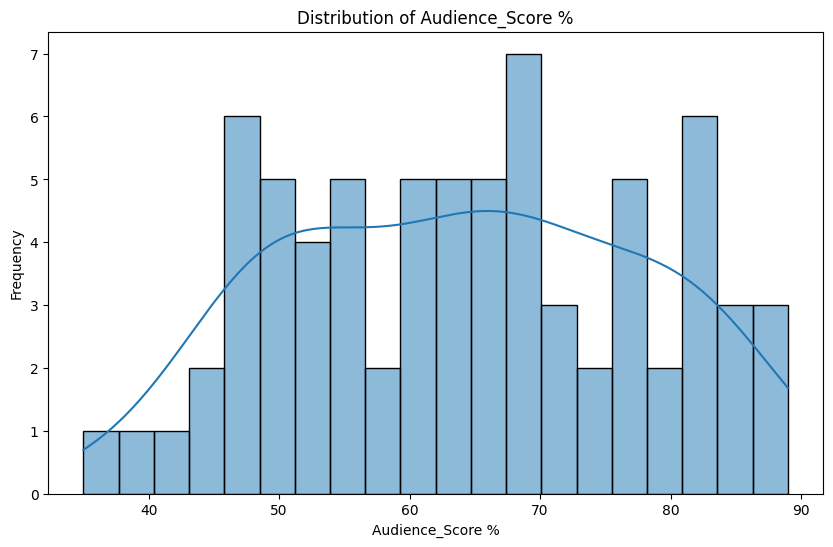

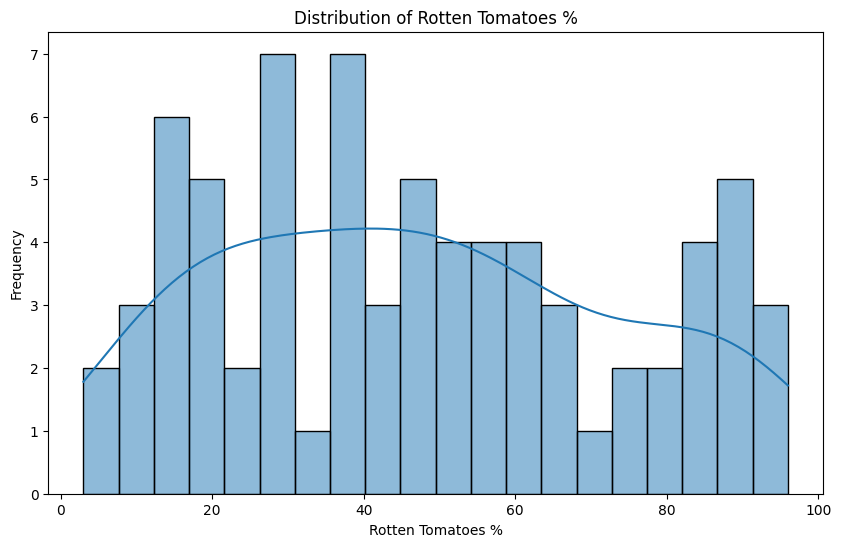

In [16]:
# Histogram for 'Audience score % and Rotten Tomatoes'
for column in audience_Tomatoes:
    plt.figure(figsize=(10, 6))
    sns.histplot(audience_Tomatoes[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.show()

#### correletion check

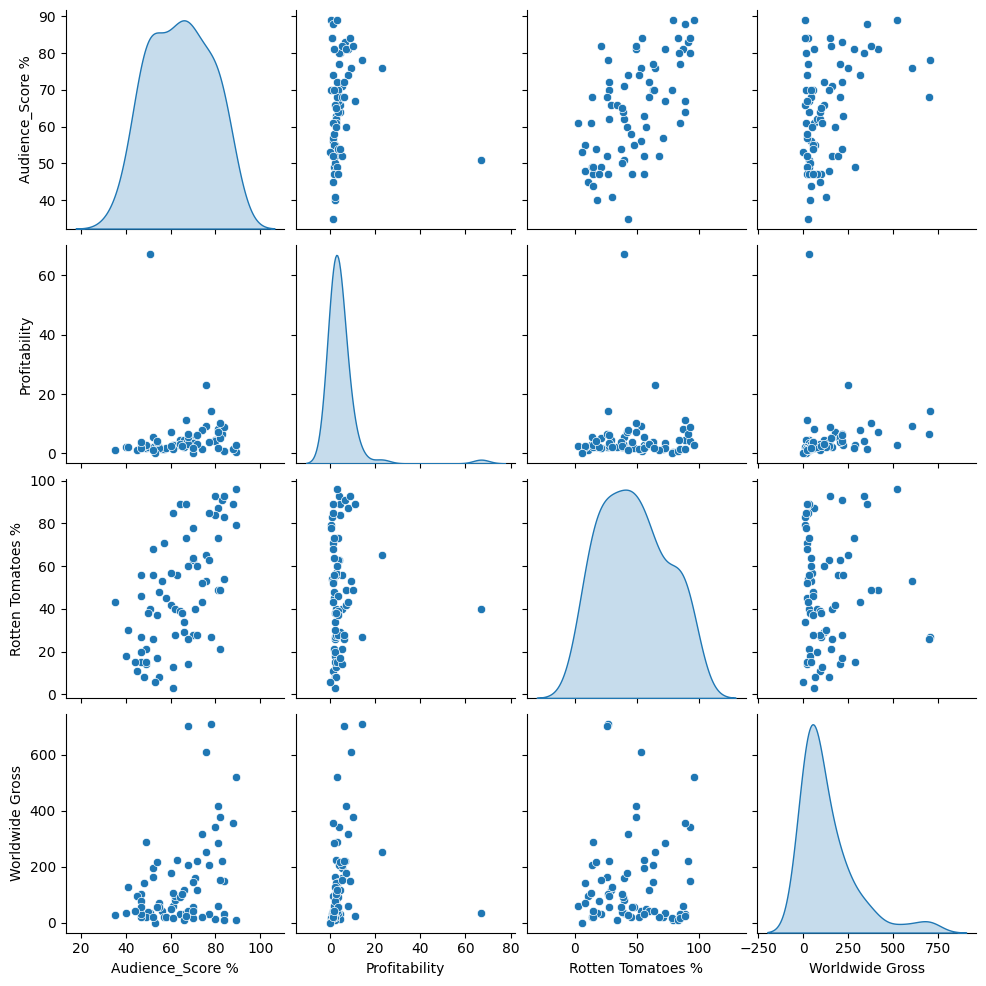

In [17]:
sns.pairplot(stories_df[["Audience_Score %","Profitability", "Rotten Tomatoes %", "Worldwide Gross"]], diag_kind='kde')

With the above we can conclude that there is a correlection between `'Audience score'` and `'Rotten Tomatoes'`:

Analylization each Genre

In [18]:
#calculating mean of each genre
mean_by_genre = stories_df.groupby("Genre")[["Audience_Score %", "Rotten Tomatoes %", "Profitability", "Worldwide Gross"]].mean()
mean_by_genre = mean_by_genre.reset_index()

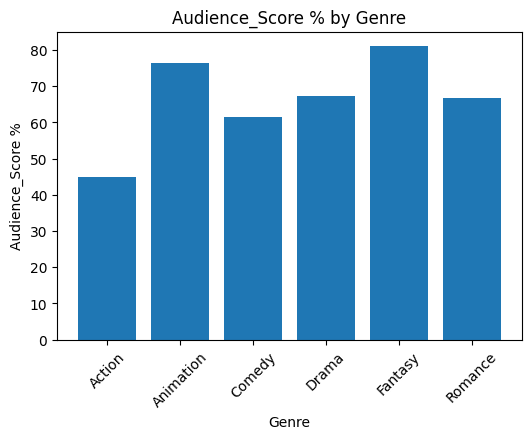

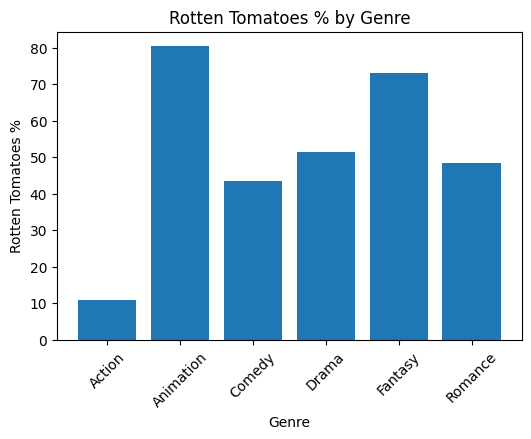

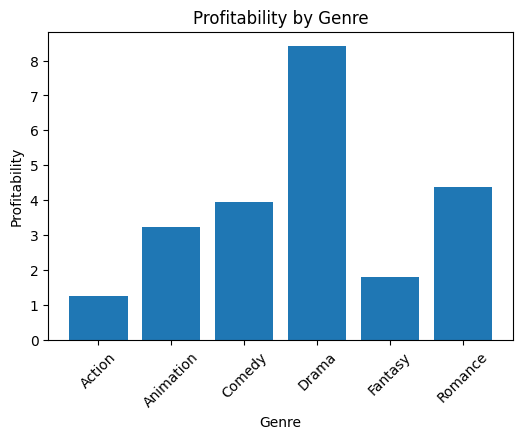

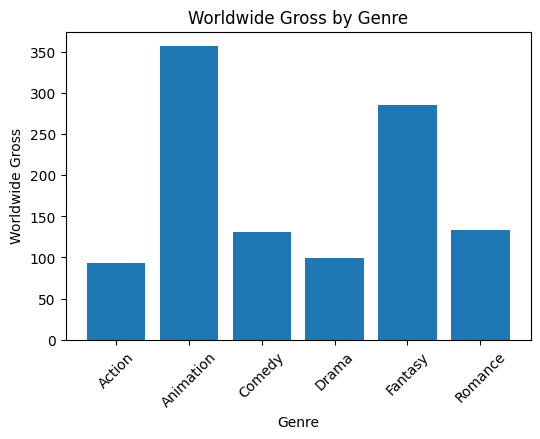

In [19]:
# bar charts for every variable with respect to the genre
mean_genre = mean_by_genre.iloc[:, 1:5]
for column in mean_genre:
    plt.figure(figsize=(6, 4))
    plt.bar(mean_by_genre["Genre"], mean_by_genre[column])
    plt.xlabel("Genre")
    plt.ylabel(column)
    plt.title(f"{column} by Genre")
    plt.xticks(rotation=45)
    plt.show()

Analylization each Lead studio

In [20]:
#calculating the mean of each Lead studio
mean_by_lead_studio = stories_df.groupby("Lead Studio")[["Audience_Score %", "Rotten Tomatoes %", "Profitability", "Worldwide Gross"]].mean()
mean_by_lead_studio = mean_by_lead_studio.reset_index()

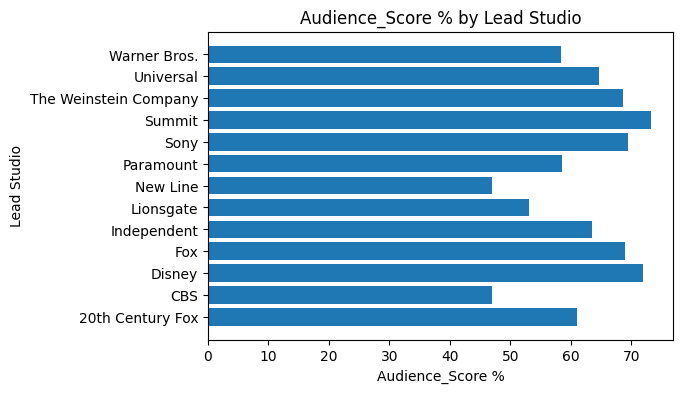

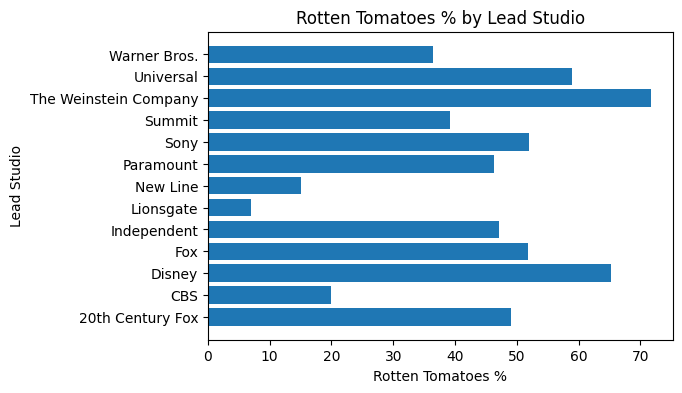

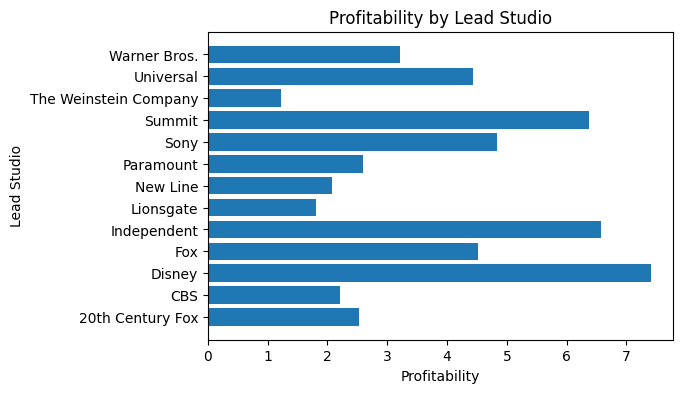

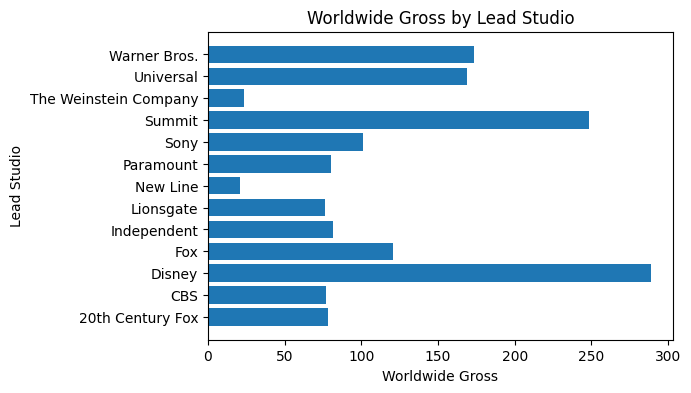

In [25]:
# bar chart for each variable with respect to the lead studio
mean_studio = mean_by_lead_studio.iloc[:, 1:5]
for column in mean_studio:
    plt.figure(figsize=(6, 4))
    plt.barh(mean_by_lead_studio["Lead Studio"], mean_by_lead_studio[column])
    plt.ylabel("Lead Studio")
    plt.xlabel(column)
    plt.title(f"{column} by Lead Studio")
    plt.xticks(rotation=0)
    plt.show()

Analyzing each year

In [22]:
#grouping the years
grouped_by_year = stories_df.groupby("Year")[["Audience_Score %", "Rotten Tomatoes %", "Profitability", "Worldwide Gross"]].mean()
grouped_by_year = grouped_by_year.reset_index()

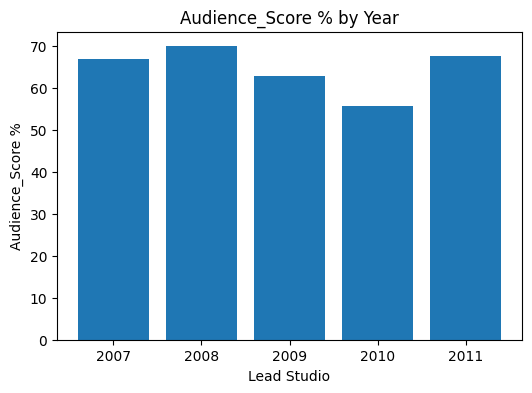

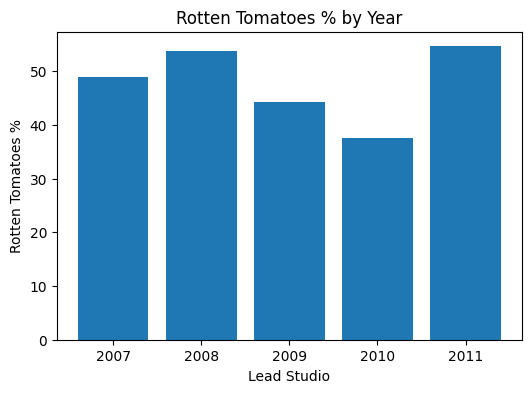

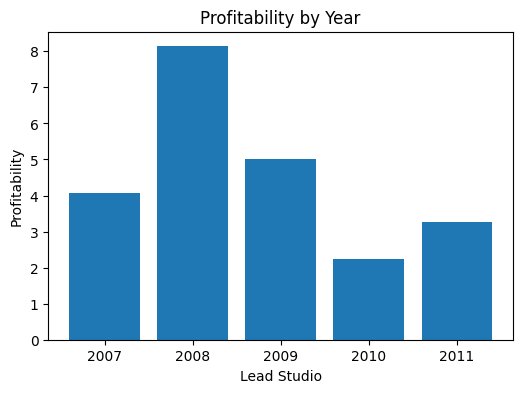

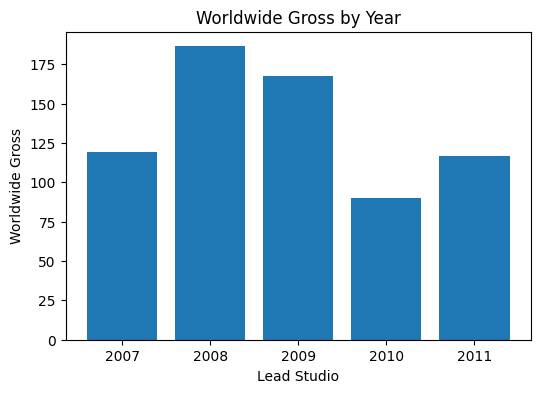

In [26]:
# bar chart for each variable with respect to the year
mean_year = grouped_by_year.iloc[:, 1:5]
for column in mean_year:
    plt.figure(figsize=(6, 4))
    plt.bar(grouped_by_year["Year"], grouped_by_year[column])
    plt.xlabel("Lead Studio")
    plt.ylabel(column)
    plt.title(f"{column} by Year")
    plt.xticks(rotation=0)
    plt.show()